In [11]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import warnings

warnings.filterwarnings('ignore')

# Configuração de plots
# Se este estilo der erro, substitui por: plt.style.use('default')
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Packages imported successfully!")
print(f"NumPy version: {np.__version__}")


✅ Packages imported successfully!
NumPy version: 1.26.4


In [15]:
# Signal parameters
fs = 360  # Sampling frequency (Hz) - standard for ECG
duration = 10  # Duration in seconds
t = np.arange(0, duration, 1/fs)  # Time vector

# Simulate heart beats
heart_rate = 75  # Beats per minute (bpm)
freq = heart_rate / 60  # Convert to Hz (beats per second)

# Generate synthetic ECG using sinusoidal waves
# Real ECG is more complex (P-QRS-T waves), this is simplified
ecg = (
    1.0 * np.sin(2 * np.pi * freq * t) +      # Main component
    0.3 * np.sin(2 * np.pi * 2 * freq * t) +  # 2nd harmonic
    0.1 * np.sin(2 * np.pi * 3 * freq * t)    # 3rd harmonic
)

# Add noise to simulate real-world interference
noise = 0.1 * np.random.randn(len(t))
ecg_noisy = ecg + noise

print(f"✅ ECG signal generated!")
print(f"Duration: {duration}s")
print(f"Sampling rate: {fs} Hz")
print(f"Number of samples: {len(ecg_noisy)}")
print(f"Simulated heart rate: {heart_rate} bpm")

✅ ECG signal generated!
Duration: 10s
Sampling rate: 360 Hz
Number of samples: 3600
Simulated heart rate: 75 bpm


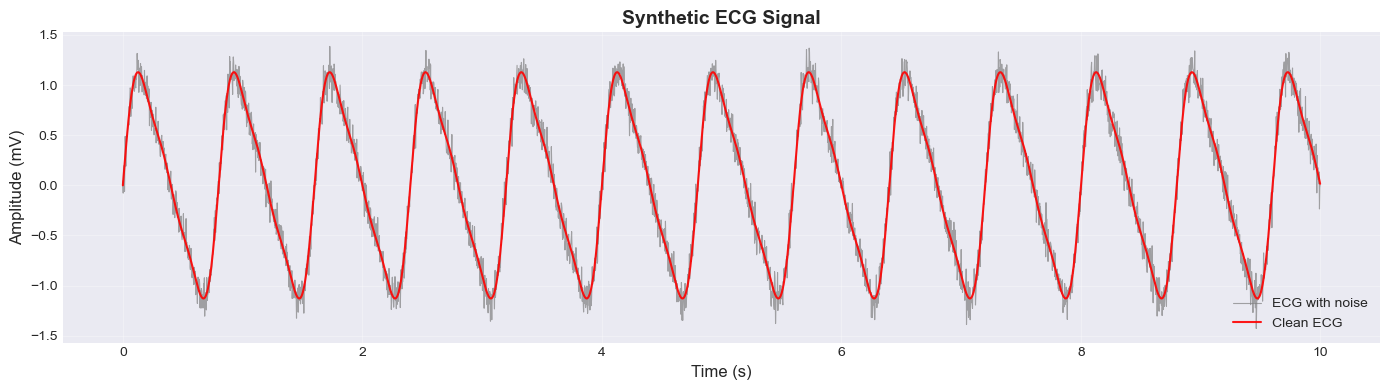

📊 Plot generated!


In [17]:
# Plot the generated signal
plt.figure(figsize=(14, 4))
plt.plot(t, ecg_noisy, linewidth=0.8, alpha=0.7, label='ECG with noise', color='gray')
plt.plot(t, ecg, linewidth=1.5, alpha=0.9, label='Clean ECG', color='red')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude (mV)', fontsize=12)
plt.title('Synthetic ECG Signal', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Plot generated!")

In [19]:
# Low-pass filter to remove high-frequency noise
# Butterworth filter is commonly used in biomedical signal processing

cutoff = 40  # Cutoff frequency in Hz
order = 4    # Filter order (higher = sharper cutoff)

# Design the filter
nyquist = fs / 2  # Nyquist frequency (half of sampling rate)
normal_cutoff = cutoff / nyquist  # Normalize cutoff frequency
b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

# Apply filter (filtfilt = zero phase shift, forward-backward filtering)
ecg_filtered = signal.filtfilt(b, a, ecg_noisy)

print(f"✅ Low-pass filter applied!")
print(f"Cutoff frequency: {cutoff} Hz")
print(f"Filter order: {order}")

✅ Low-pass filter applied!
Cutoff frequency: 40 Hz
Filter order: 4


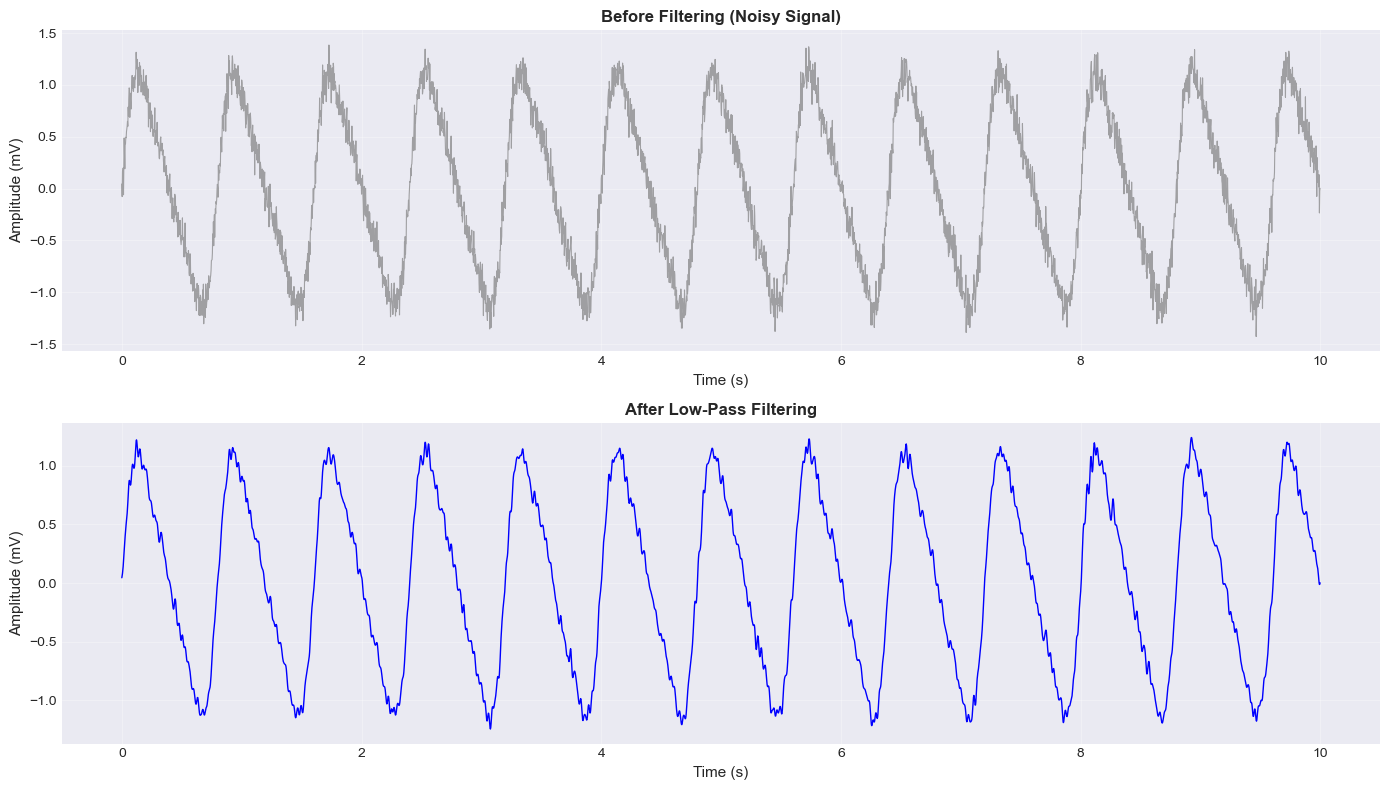

📊 Comparison plot generated!


In [21]:
# Visual comparison: noisy vs filtered signal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Before filtering (noisy signal)
ax1.plot(t, ecg_noisy, linewidth=0.8, alpha=0.7, color='gray')
ax1.set_xlabel('Time (s)', fontsize=11)
ax1.set_ylabel('Amplitude (mV)', fontsize=11)
ax1.set_title('Before Filtering (Noisy Signal)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# After filtering (clean signal)
ax2.plot(t, ecg_filtered, linewidth=1, color='blue')
ax2.set_xlabel('Time (s)', fontsize=11)
ax2.set_ylabel('Amplitude (mV)', fontsize=11)
ax2.set_title('After Low-Pass Filtering', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Comparison plot generated!")

In [23]:
# Detect R-peaks (heartbeats) using scipy.signal.find_peaks

# Detection parameters
height = 0.5  # Minimum peak height (adjust if needed)
distance = fs * 0.5  # Minimum distance between peaks (0.5s = max 120 bpm)

# Find peaks in filtered signal
peaks, properties = signal.find_peaks(ecg_filtered, height=height, distance=distance)

# Calculate heart rate from detected peaks
num_peaks = len(peaks)
heart_rate_detected = (num_peaks / duration) * 60  # Convert to bpm

print(f"✅ R-peaks detected!")
print(f"Number of peaks found: {num_peaks}")
print(f"Detected heart rate: {heart_rate_detected:.1f} bpm")
print(f"Expected heart rate: {heart_rate} bpm")
print(f"Detection error: {abs(heart_rate_detected - heart_rate):.1f} bpm")

✅ R-peaks detected!
Number of peaks found: 13
Detected heart rate: 78.0 bpm
Expected heart rate: 75 bpm
Detection error: 3.0 bpm


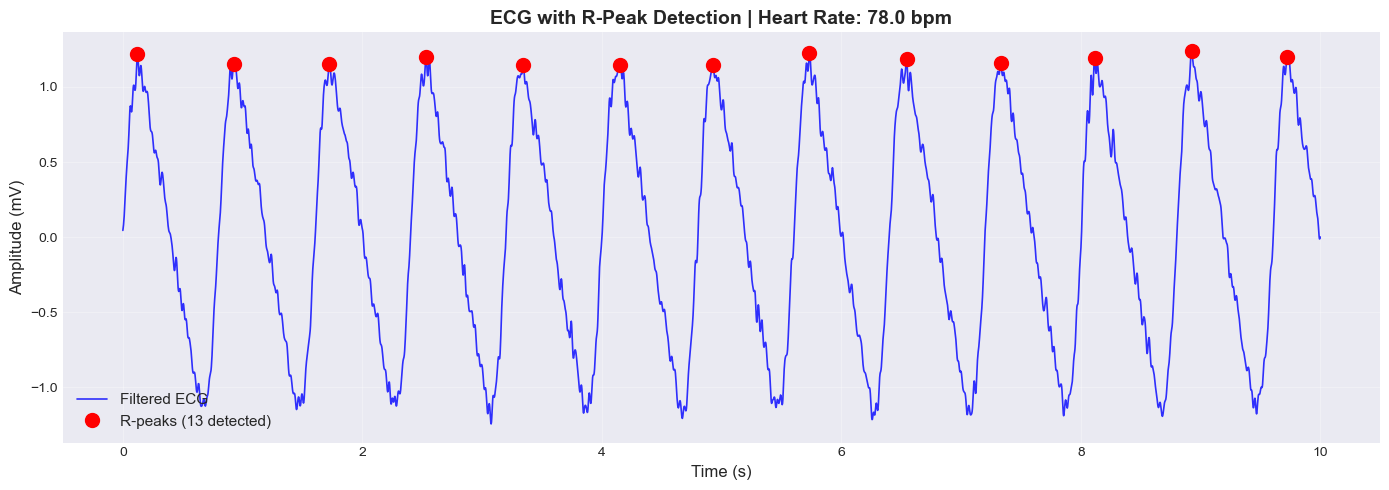

📊 Final visualization complete!
✅ Notebook finished!


In [25]:
# Final plot: ECG with detected R-peaks marked
plt.figure(figsize=(14, 5))
plt.plot(t, ecg_filtered, linewidth=1.2, label='Filtered ECG', alpha=0.8, color='blue')
plt.plot(t[peaks], ecg_filtered[peaks], 'ro', markersize=10, 
         label=f'R-peaks ({num_peaks} detected)', zorder=5)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude (mV)', fontsize=12)
plt.title(f'ECG with R-Peak Detection | Heart Rate: {heart_rate_detected:.1f} bpm', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Final visualization complete!")
print("✅ Notebook finished!")